# Análisis estadístico con Pandas y Pingouin

Este tutorial es una selección de los cursos [`Introducción a Python para la Investigación Psicológica`](https://github.com/renatoparedes/IntroPythonInvestigacionPsicologia) y [`Estadística y Psicología Matemática`](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica) desarrollados por el profesor Renato Paredes del Departamento de Psicología de la PUCP.

Este material está basado en el lenguaje de programación Python. **Si nunca has programado en Python, puedes acceder a un tutorial introductorio a través de este [enlace](https://colab.research.google.com/github/renatoparedes/EstadisticaYPsicologiaMatematica/blob/main/IntroaPython.ipynb)**.

Además, supone un conocimiento básico de carga, manipulación y visualización de datos con Pandas y Seaborn. En caso desees refrescar, puedes referirte a los siguientes tutoriales: 
- [Carga y manipulación de datos](https://colab.research.google.com/github/renatoparedes/IntroPythonInvestigacionPsicologia/blob/master/AnalisisdeDatosCuantitativos/PreprocesamientoDeDatos.ipynb)
- [Visualización de datos](https://colab.research.google.com/github/renatoparedes/IntroPythonInvestigacionPsicologia/blob/master/AnalisisdeDatosCuantitativos/VisualizacionDeDatos.ipynb)


## Estadística descriptiva


Primero, vamos a cargar nuestra base de datos en un DataFrame de Pandas:

In [6]:
import pandas as pd

sw = pd.read_csv(
    "https://raw.githubusercontent.com/gastonstat/matrix4sl/master/data/starwars.csv"
)
sw.head()

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber


In [7]:
sw

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber
5,Obi-Wan Kenobi,male,1.82,77.0,bluegray,auburn,fair,Stewjon,57BBY,0BBY,yes_jedi,human,lightsaber
6,Han Solo,male,1.80,80.0,brown,brown,light,Corellia,29BBY,unk_died,no_jedi,human,blaster
7,Sheev Palpatine,male,1.73,75.0,blue,red,pale,Naboo,82BBY,10ABY,no_jedi,human,force-lightning
8,R2-D2,male,0.96,32.0,NaN,NaN,NaN,Naboo,33BBY,unk_died,no_jedi,droid,unarmed
9,C-3PO,male,1.67,75.0,NaN,NaN,NaN,Tatooine,112BBY,3ABY,no_jedi,droid,unarmed


### Resumen global de medidas estadísticas

Pandas ofrece rutinas útiles para obtener rápidamente estadísticas descriptivas con una sola función o llamada a un método. 

Puedes usar `describe()` así:

In [12]:
sw.describe()

,height,weight
count,20.000000,19.000000
mean,1.789000,74.868421
std,0.632405,30.112678
min,0.660000,17.000000
25%,1.665000,62.500000
50%,1.790000,78.000000
75%,1.892500,82.000000
max,3.900000,159.000000


Este método devuelve un nuevo DataFrame que contiene lo siguiente:

- count: la cantidad de elementos en su conjunto de datos
- mean: la media de su conjunto de datos
- std: la desviación estándar de su conjunto de datos
- min y max: los valores mínimo y máximo de su conjunto de datos
- 25%, 50% y 75%: los cuartiles de su conjunto de datos

Puedes calcular cada resultado por separado llamando a los métodos específicos:

In [105]:
sw.count()

name         20
gender       20
height       20
weight       19
eyecolor     18
haircolor    18
skincolor    17
homeland     20
born         20
died         20
jedi         20
species      20
weapon       20
dtype: int64

In [16]:
sw.mean(numeric_only=True)

height     1.789000
weight    74.868421
dtype: float64

In [107]:
sw.std(numeric_only=True)

height     0.632405
weight    30.112678
dtype: float64

In [108]:
sw.min(numeric_only=True)

height     0.66
weight    17.00
dtype: float64

In [109]:
sw.max(numeric_only=True)

height      3.9
weight    159.0
dtype: float64

In [110]:
sw.quantile(0.25, numeric_only=True)

height     1.665
weight    62.500
Name: 0.25, dtype: float64

In [111]:
sw.quantile(0.75, numeric_only=True)

height     1.8925
weight    82.0000
Name: 0.75, dtype: float64

### Forma de la distribución

La asimetría es un parámetro para medir la simetría de un conjunto de datos y la curtosis para medir qué tan pesadas son sus colas en comparación con una distribución normal.

Veámoslo en nuestro ejemplo:

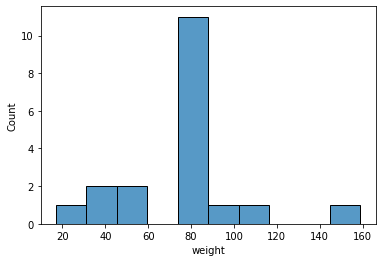

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x="weight", data=sw)
plt.show()

In [28]:
print("skew:", sw["weight"].skew())
print("kurtosis:", sw["weight"].kurtosis())

skew: 0.7274902112518916
kurtosis: 2.871429772733397


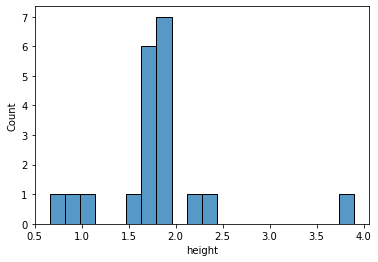

In [29]:
sns.histplot(x="height", data=sw)
plt.show()

In [30]:
print("skew:", sw["height"].skew())
print("kurtosis:", sw["height"].kurtosis())

skew: 1.6310448597414178
kurtosis: 6.5905839871644964


## Análisis de correlación 

En Pandas puedes llamar al método `.corr()` presente en los objetos de tipo Series o DataFrame. 

>**Nota:** Cuando trabajes con instancias de DataFrame, debes tener en cuenta que las filas son observaciones y las columnas son características o variables.

In [116]:
sw.corr()

,height,weight
height,1.000000,0.853301
weight,0.853301,1.000000


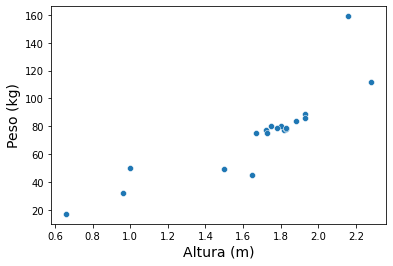

In [36]:
corr_plot = sns.scatterplot(x="height", y="weight", data=sw)
corr_plot.set_xlabel("Altura (m)", size=14)
corr_plot.set_ylabel("Peso (kg)", size=14)
plt.show()

Puedes usar `.corr()` para calcular los tres coeficientes de correlación:

- 'pearson'
- 'spearman'
- 'kendall'

In [118]:
sw.corr(method="pearson")

,height,weight
height,1.000000,0.853301
weight,0.853301,1.000000


In [119]:
sw.corr(method="spearman")

,height,weight
height,1.000000,0.936236
weight,0.936236,1.000000


In [120]:
sw.corr(method="kendall")

,height,weight
height,1.000000,0.815491
weight,0.815491,1.000000


Puedes aplicar `.corr()` de la misma manera con los objetos DataFrame que contienen tres o más columnas. Primero, carguemos los datos:

In [38]:
# Cargamos los datos
df_subsdis = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv"
)
df_subsdis.drop(columns=["year"], inplace=True)
df_subsdis.dropna(inplace=True)
df_subsdis.head()

,entity,code,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
0,Afghanistan,AFG,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217
1,Albania,ALB,0.201025,0.704480,0.174046,3.385245,0.517614,2.208414,1.837955
2,Algeria,DZA,0.197913,0.818687,0.213612,5.065876,1.717218,3.661094,0.665191
3,American Samoa,ASM,0.248557,0.468305,0.177808,3.315834,0.772801,2.939668,1.142277
5,Andorra,AND,0.263512,0.963331,0.644559,5.305375,0.910066,3.729532,1.256050


Ahora, generemos la matriz de correlaciones:

In [122]:
df_subsdis.corr()

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
schizophrenia,1.000000,0.205585,0.677919,0.440768,0.372639,0.087073,-0.028239
bipolar_disorder,0.205585,1.000000,0.705969,0.652679,0.322707,0.085396,0.070097
eating_disorders,0.677919,0.705969,1.000000,0.674200,0.363781,0.185293,0.040568
anxiety_disorders,0.440768,0.652679,0.674200,1.000000,0.572434,0.356654,-0.155977
drug_use_disorders,0.372639,0.322707,0.363781,0.572434,1.000000,0.336011,-0.165363
depression,0.087073,0.085396,0.185293,0.356654,0.336011,1.000000,-0.026589
alcohol_use_disorders,-0.028239,0.070097,0.040568,-0.155977,-0.165363,-0.026589,1.000000


### Mapas de calor de matrices de correlación

¡La matriz de correlación puede volverse realmente grande y confusa cuando tiene muchas funciones! Afortunadamente, puedes presentarlo visualmente como un mapa de calor donde cada campo tiene el color que corresponde a su valor. Para realizarlo, nos apoyaremos en la función `heatmap` presente en el paquete seaborn:

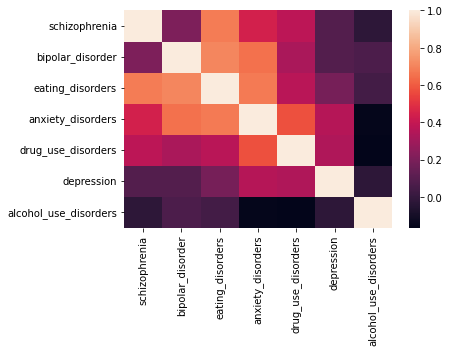

In [136]:
import seaborn as sns

sns.heatmap(df_subsdis.corr())
plt.show()

También podemos observar gráficamente la correlación por pares, empleando la función `pairplot` del paquete seaborn: 

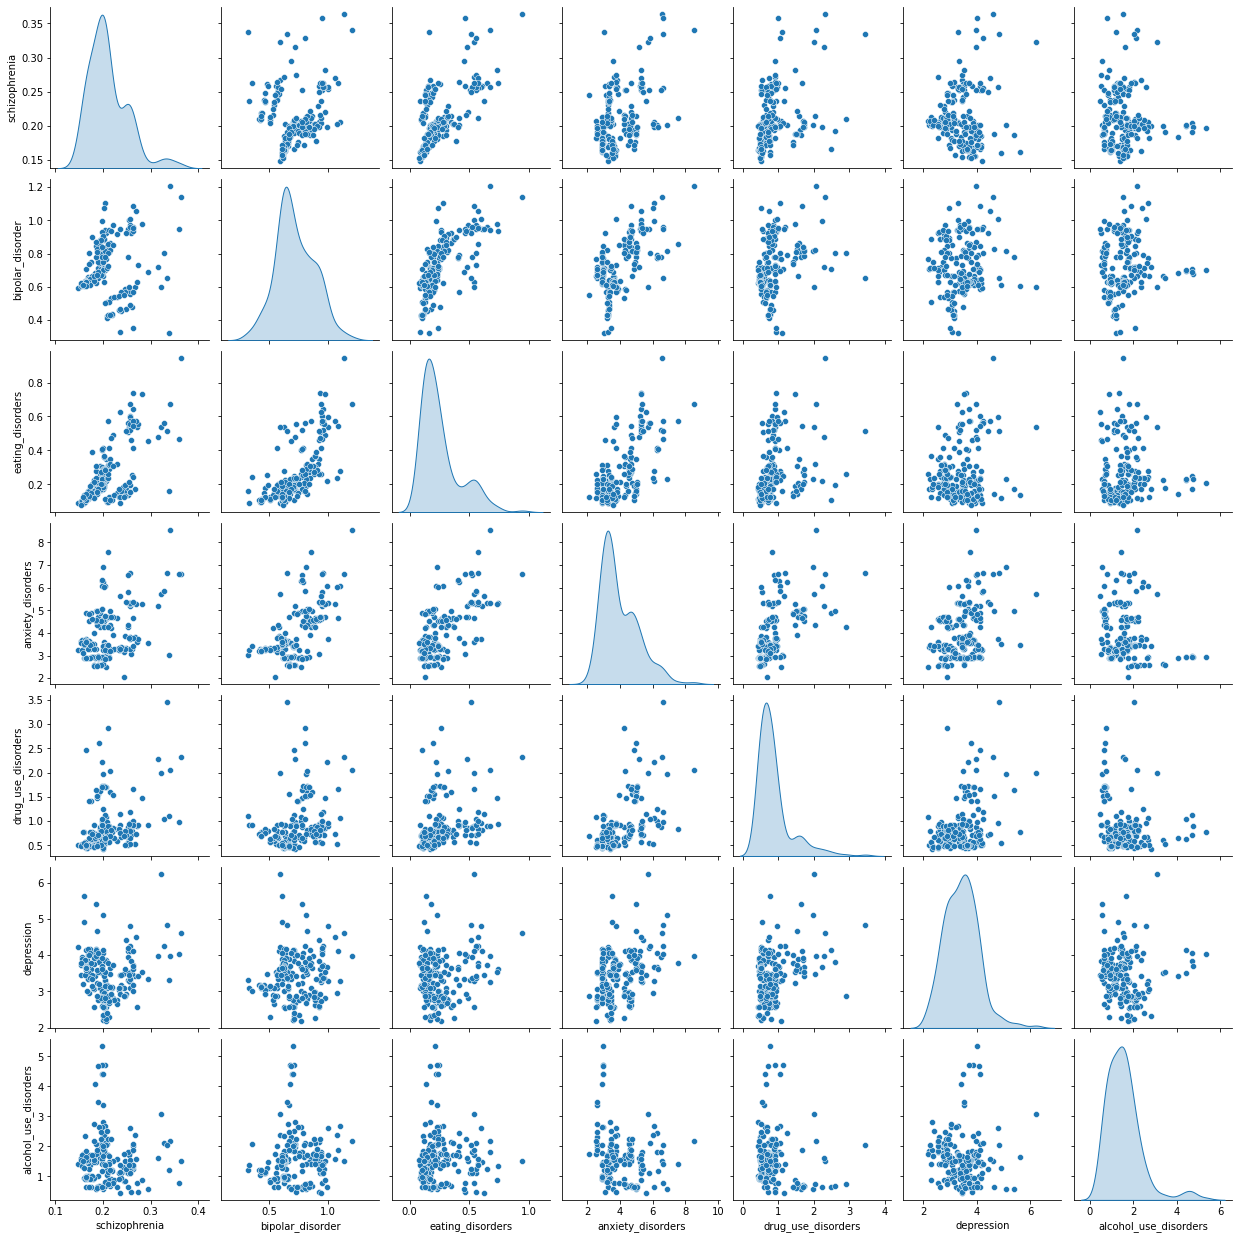

In [137]:
sns.pairplot(df_subsdis, diag_kind="kde")
plt.show()

## Estadística inferencial


### Análisis de normalidad

En Python podemos generar la gráfica de probabilidad normal con la función `qqplot` disponible en el paquete `pingouin`:

In [125]:
!pip install pingouin

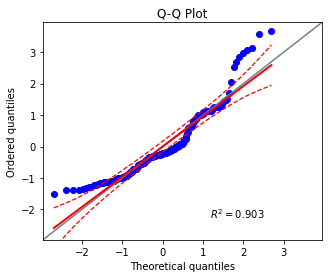

In [42]:
import pingouin as pg

pg.qqplot(df_subsdis["schizophrenia"], dist="norm")
plt.show()

También podemos aplicar pruebas inferenciales de normalidad:

In [127]:
pg.normality(df_subsdis["schizophrenia"], method="shapiro")

,W,pval,normal
schizophrenia,0.902425,4.824507e-10,False


### Análisis de heterocedasticidad

Gráficamente podemos analizar la homogeneidad de varianzas:

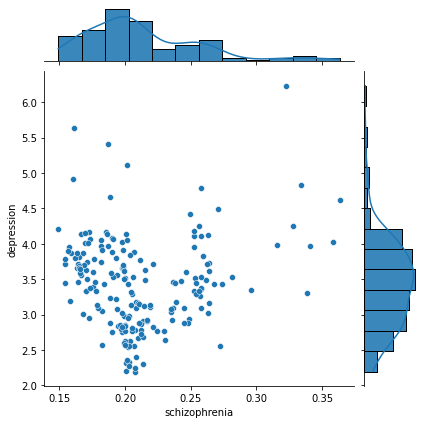

In [139]:
ax = sns.jointplot(x="schizophrenia", y="depression", data=df_subsdis)
ax.plot_marginals(sns.histplot, kde=True)
plt.show()

O por medio de una prueba inferencial:

In [129]:
pg.homoscedasticity(df_subsdis[["depression", "schizophrenia"]])

,W,pval,equal_var
levene,260.263006,3.225204e-45,False


### Prueba t de student

En Python podemos emplear la función `ttest` disponible en el paquete `pingouin`:

In [52]:
pg.ttest(df_subsdis["depression"], df_subsdis["schizophrenia"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,69.877235,390,two-sided,1.207319e-222,"[3.14, 3.32]",7.058667,1.451e+218,1.0


Esta función nos permite aplicar la prueba t para muestras independientes o relacionadas manipulando el argumento `paired`. Además, podemos especificar si queremos la prueba de Welch con el argumento `correction`.

#### Alternativas no paramétricas: Mann-Whitney y Wilcoxon

En `pingouin` encontramos funciones dedicadas para estas pruebas:

In [131]:
pg.mwu(df_subsdis["depression"], df_subsdis["schizophrenia"])

,U-val,alternative,p-val,RBC,CLES
MWU,38416.0,two-sided,9.802451e-66,-1.0,1.0


In [132]:
pg.wilcoxon(df_subsdis["depression"], df_subsdis["schizophrenia"])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,6.550900e-34,1.0,1.0


### Análisis de correlación

Podemos emplear `pingouin` para obtener los resultados inferenciales de nuestros análisis de correlación con el método `.rcorr()`:

In [55]:
df_subsdis.rcorr()

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
schizophrenia,-,**,***,***,***,,
bipolar_disorder,0.206,-,***,***,***,,
eating_disorders,0.678,0.706,-,***,***,**,
anxiety_disorders,0.441,0.653,0.674,-,***,***,*
drug_use_disorders,0.373,0.323,0.364,0.572,-,***,*
depression,0.087,0.085,0.185,0.357,0.336,-,
alcohol_use_disorders,-0.028,0.07,0.041,-0.156,-0.165,-0.027,-


Para interpretar los resultados, el triángulo superior puede leerse con esta esta leyenda:

- p < 0.001: *** 
- p < 0.01: ** 
- p < 0.05: *

El triángulo inferior, muestra el valor de los coeficientes de correlación.

### Análisis de regresión

Podemos usar pingouin para construir modelos de regresión con la función `linear_regression`:

In [134]:
model = pg.linear_regression(
    df_subsdis[["anxiety_disorders", "depression", "bipolar_disorder"]],
    df_subsdis["eating_disorders"],
    relimp=True,
)
model

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-0.299500,0.052076,-5.751165,3.446008e-08,0.577955,0.571361,-0.402216,-0.196785,NaN,NaN
1,anxiety_disorders,0.052469,0.009738,5.388345,2.068089e-07,0.577955,0.571361,0.033263,0.071675,0.256631,44.403348
2,depression,0.003969,0.012961,0.306229,7.597624e-01,0.577955,0.571361,-0.021596,0.029534,0.014718,2.546539
3,bipolar_disorder,0.463483,0.062750,7.386244,4.493945e-12,0.577955,0.571361,0.339716,0.587250,0.306606,53.050113


Si quieres profundizar, te invito a revisar material complementario con más análisis estadísticos empleados en psicología:

- [ANOVA](https://colab.research.google.com/github/renatoparedes/IntroPythonInvestigacionPsicologia/blob/master/AnalisisdeDatosCuantitativos/EstadisticaInferencial.ipynb)
- [MANOVA y Regresion Logística](https://colab.research.google.com/github/renatoparedes/EstadisticaYPsicologiaMatematica/blob/main/Legacy/Regresiones/MANOVA.ipynb)
- [Análisis Factorial Exploratorio](https://colab.research.google.com/github/renatoparedes/EstadisticaYPsicologiaMatematica/blob/main/Legacy/AFE/AnalisisFactorialExploratorio.ipynb)
- [Ecuaciones Estructurales](https://colab.research.google.com/github/renatoparedes/EstadisticaYPsicologiaMatematica/blob/main/Legacy/SEM/IntroaSEM.ipynb)
- [Análisis Factorial Confirmatorio](https://colab.research.google.com/github/renatoparedes/EstadisticaYPsicologiaMatematica/blob/main/Legacy/SEM/AFC.ipynb)